The purpose of this notebook is to go through the steps of analyzing a clean dataset from start to finish. 

In this particular task, the goal is to predict which people in the dataset are successful in applying for a credit card.

Import numpy and pandas classes.

In [1]:
import numpy as np
import pandas as pd

Read in the Credit Card Approvals file into the pandas data frame. Data taken from Kaggle.com. 
https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?select=clean_dataset.csv

For future reference, when extracting data:
1. Before scraping, check if a public API is available
2. Don't overload the website by sending hundreds of requests per second
3. Save the date when the extraction took place

In [2]:
df = pd.read_csv('Credit_Card_Approvals.csv')
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


Even though this is a clean dataset, it is good practice to see the column data types and non-missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null int64
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null int64
BankCustomer      690 non-null int64
Industry          690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null int64
Employed          690 non-null int64
CreditScore       690 non-null int64
DriversLicense    690 non-null int64
Citizen           690 non-null object
ZipCode           690 non-null int64
Income            690 non-null int64
Approved          690 non-null int64
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


This gives a good picture as to what data types correspond to each variable. If there are string data types where the variable would better be served as an int or float value, this conversion should be made.

On a side note, there are many ways to deal with null values. When starting out, it is easiest to just replace all null values with the np.nan command, and figure out how to address it later. Once all the string null values are converted to float null values, then the conversion of the variables from strings to floats can be made iteratively through a for loop.

Get the statistics for each column.

In [4]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


Calculate quantity of missing values. 

Code taken from: 
https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251

In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Since we have no missing values, we can progress to the next part of the analysis. In general, data sets will not be as clean as this one, and missing values will be quite common. There are many ways to deal with these situations, but those will be covered in alternative projects.

The next part of the analysis will be exploratory data analysis. This is where we make plots and calculate statistics to explore the data. We are looking for anomalies, patterns, trends, or relationships.

Start by importing the matplotlib and seaborn libraries.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# et Default Font Size
plt.rcParams['font.size'] = 24

import seaborn as sns
sns.set(font_scale=2)

# Set Figure Size
from IPython.core.pylabtools import figsize

Typically all of the imports should be done together, and this is how future projects will be done. It is split up here to demonstrate the value of each of the imports.

We can start with the Approved Column, as this is the target for our machine learning models. 

Text(0.5, 1.0, 'Approved vs Not Approved')

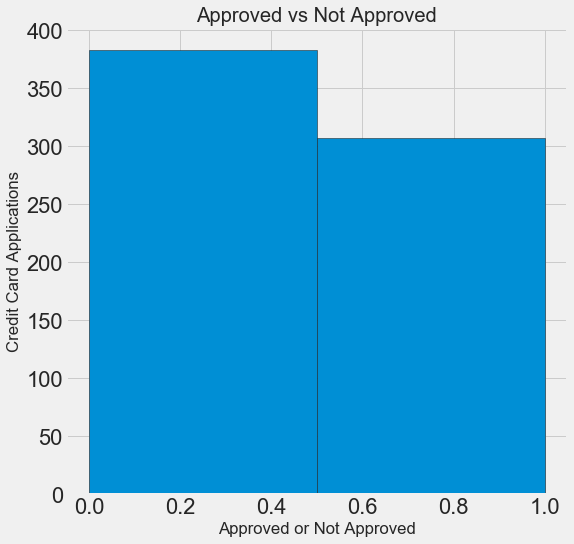

In [7]:
figsize(8, 8)

plt.style.use('fivethirtyeight')
plt.hist(df['Approved'], bins = 2, edgecolor = 'k')
plt.xlabel('Approved or Not Approved')
plt.ylabel('Credit Card Applications')
plt.title('Approved vs Not Approved')

This shows that there is a close to even breakdown of credit cards that were approved vs those that were not approved. The amount of credit cards that are approved is a little over 300 while the amount of credit cards that are not approved is somewhere in the middle of 350-400.

Another variable that could be useful to explore is the age. More specifically, the distribution of age of credit card applicants could shed some light into what age demographic has a higher likelihood of success.

In [8]:
df['Age'].value_counts()

28.46    12
22.67     9
20.42     7
24.50     6
20.67     6
         ..
17.83     1
44.83     1
60.58     1
50.08     1
28.33     1
Name: Age, Length: 350, dtype: int64

From the previous executable, we see that the quantity of applicants are between 20-29. Now we can investigate which age demographics are likely to be approved.

In [9]:
rslt_df = df.loc[df['Approved'] == 1]
rslt_df['Age'].value_counts()

33.17    4
22.67    4
20.42    4
23.25    4
25.00    4
        ..
44.17    1
24.17    1
34.42    1
28.08    1
38.58    1
Name: Age, Length: 226, dtype: int64

 It seems that people in their 20s to early 30s have a higher frequency of getting accepted. Now we can investigate debt.

In [10]:
rslt_df['Debt'].value_counts()

0.000     9
3.000     9
6.500     8
1.500     7
0.500     7
         ..
6.210     1
12.540    1
2.415     1
6.040     1
7.000     1
Name: Debt, Length: 147, dtype: int64

The relationship of debt with approval seems fairly arbitrary. While having no debt is likely to help in your approval, having any amount of debt is subject to random variance with regards to approval. 

Now we can investigate credit score.

In [11]:
rslt_df['CreditScore'].value_counts()

0     98
1     35
6     20
3     20
2     19
11    18
5     16
7     15
4     12
8     10
9     10
14     8
12     7
10     4
15     4
16     3
17     2
40     1
13     1
19     1
20     1
23     1
67     1
Name: CreditScore, dtype: int64

It seems that having no credit score or a very low credit score of 1 is an incredibly high predictor in getting approval. This is very interesting, as in the real world, higher credit scores are more beneficial. This can be investigated further with visuals. 

Before we do that, lets look at the quantity of years employed.

In [12]:
rslt_df['YearsEmployed'].value_counts()

0.000    18
0.040    13
1.500    12
2.500    11
1.750     9
         ..
2.085     1
5.085     1
5.040     1
5.335     1
8.665     1
Name: YearsEmployed, Length: 118, dtype: int64

It also seems that less employment equates to a higher likelihood of approval. This is also very interesting as more employment typically equates to a higher level of reliability. Given the two counterintuitive fields of data both in credit score and years employed, it will give a better picture to visualize the two fields with plots.

Text(0.5, 1.0, 'Credit Score Distribution')

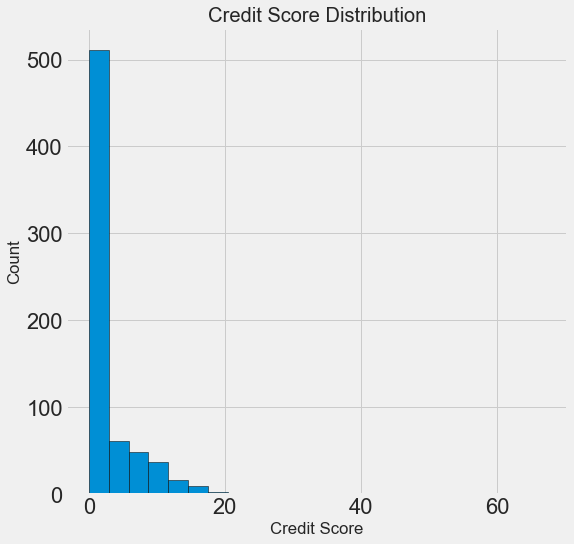

In [13]:
figsize(8, 8)
plt.hist(df['CreditScore'], bins = len(pd.unique(df['CreditScore'])), edgecolor = 'black')
plt.xlabel('Credit Score') 
plt.ylabel('Count')
plt.title('Credit Score Distribution')

Text(0.5, 1.0, 'Years Employed Distribution')

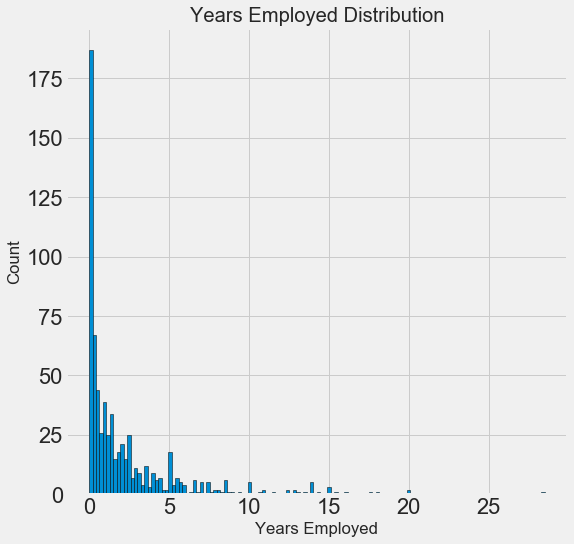

In [14]:
figsize(8, 8)
plt.hist(df['YearsEmployed'], bins = len(pd.unique(df['YearsEmployed'])), edgecolor = 'black')
plt.xlabel('Years Employed') 
plt.ylabel('Count')
plt.title('Years Employed Distribution')

These plots clearly show that there is a significantly greater amount of applicants from the lower end of the credit score distribution and years employed distribution. This sufficiently explains why so many more approved applicants are from the lower end of the spectrum. It is simply a matter of mass applicants from that end of the spectrum, and fewer candidates from the upper end of the spectrum.

Our categorical variables are Industry, Ethnicity, and Citizen. We can investigate the relationships of each of these with whether or not the credit card was approved using density plots.

First, let's investigate by Industry.

In [15]:
# Create a list of industries
industries = df.dropna(subset=['Approved'])
industries = industries['Industry'].value_counts()
industries = list(industries[industries.values > 0].index)

Text(0.5, 1.0, 'Approved by Industry')

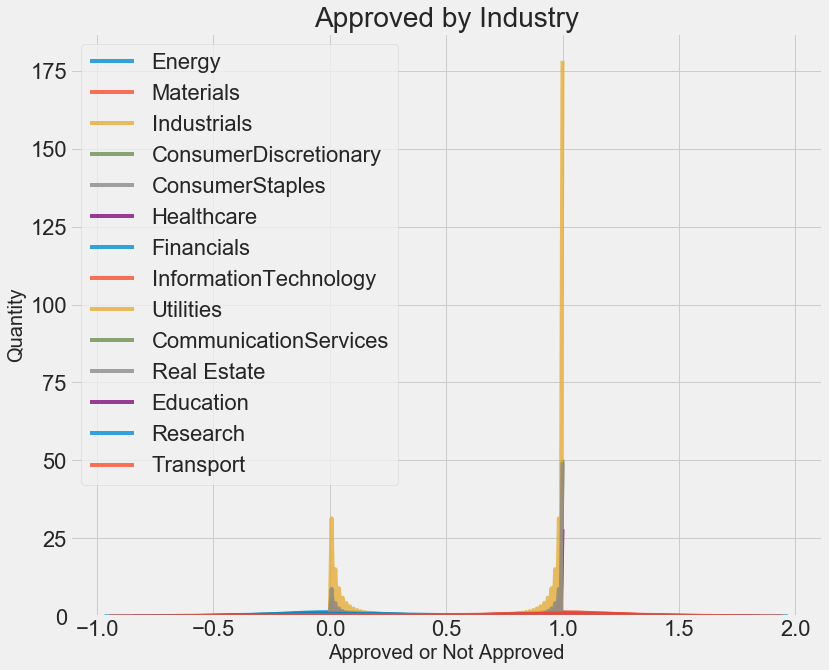

In [16]:
# Plot of distribution of Approved for industry categories
figsize(12, 10)

# Plot each industry
for b_industry in industries:
    # Select the industry type
    subset = df[df['Industry'] == b_industry]
    
    # Density plot of Approval
    sns.kdeplot(subset['Approved'].dropna(),
               label = b_industry, shade = False, alpha = 0.8)
    
# label the plot
plt.xlabel('Approved or Not Approved', size = 20)
plt.ylabel('Quantity', size = 20) 
plt.title('Approved by Industry', size = 28)

The correlation between Industry and Approved seems to be very low. Information Technology seems to have an incredibly marginal advantage in getting approved.

Next, we investigate by Ethnicity.

In [17]:
# Create a list of ethnicities
ethnicities = df.dropna(subset=['Approved'])
ethnicities = ethnicities['Ethnicity'].value_counts()
ethnicities = list(ethnicities[ethnicities.values > 0].index)

Text(0.5, 1.0, 'Approved by Ethnicity')

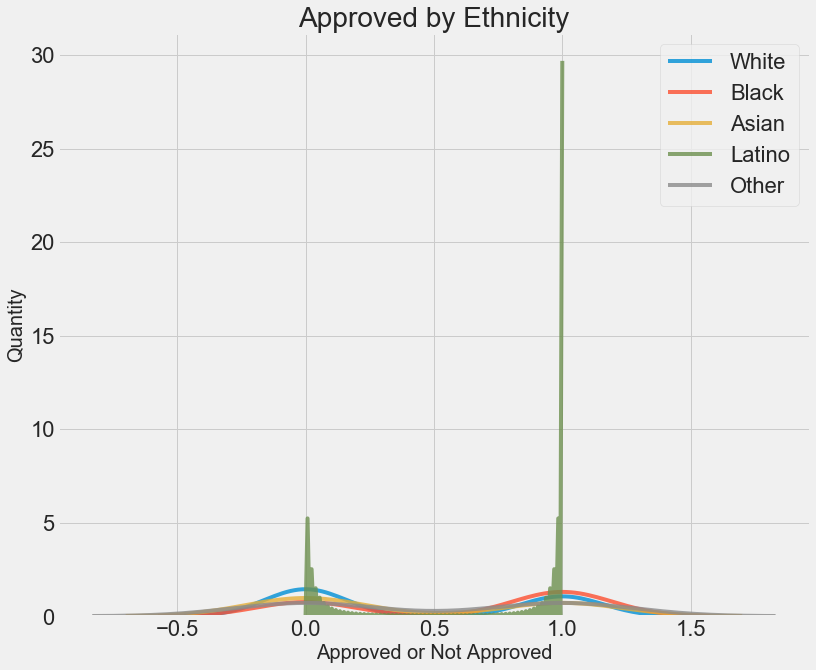

In [18]:
# Plot of distribution of Approved for ethnicity categories
figsize(12, 10)

# Plot each ethnicity
for b_ethnicity in ethnicities:
    # Select the ethnicity type
    subset = df[df['Ethnicity'] == b_ethnicity]
    
    # Density plot of Approval
    sns.kdeplot(subset['Approved'].dropna(),
               label = b_ethnicity, shade = False, alpha = 0.8)
    
# label the plot
plt.xlabel('Approved or Not Approved', size = 20)
plt.ylabel('Quantity', size = 20) 
plt.title('Approved by Ethnicity', size = 28)

There seems to be a skew towards the black ethnicity for approval and white ethnicity for disapproval. The skew seems to be quite marginal nonetheless.

Finally, we investigate by Citizen.

In [19]:
# Create a list of citizens
citizens = df.dropna(subset=['Approved'])
citizens = citizens['Citizen'].value_counts()
citizens = list(citizens[citizens.values > 0].index)

Text(0.5, 1.0, 'Approved by Citizen')

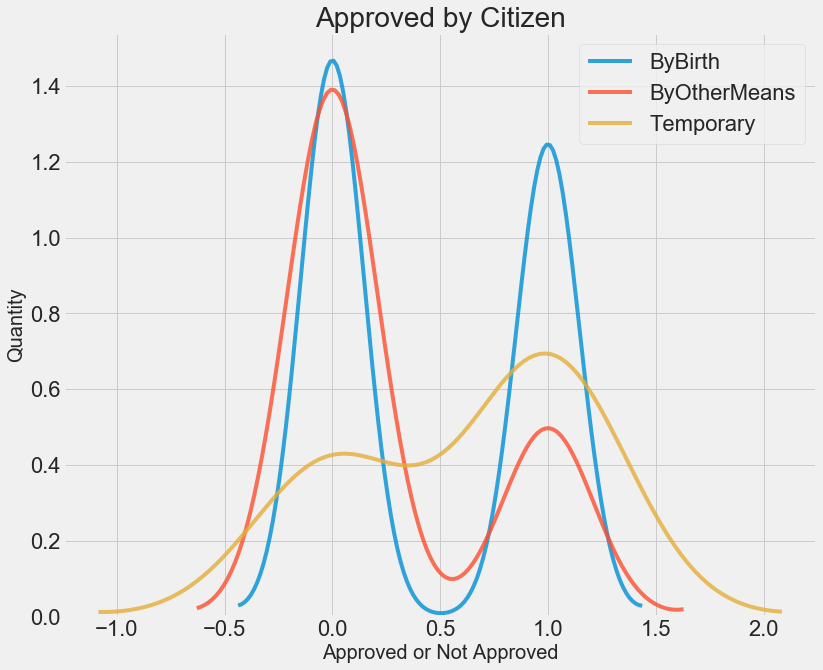

In [20]:
# Plot of distribution of Approved for citizen categories
figsize(12, 10)

# Plot each citizen
for b_citizen in citizens:
    # Select the citizen type
    subset = df[df['Citizen'] == b_citizen]
    
    # Density plot of Approval
    sns.kdeplot(subset['Approved'].dropna(),
               label = b_citizen, shade = False, alpha = 0.8)
    
# label the plot
plt.xlabel('Approved or Not Approved', size = 20)
plt.ylabel('Quantity', size = 20) 
plt.title('Approved by Citizen', size = 28)

This is quite significant. Being a citizen by birth is a huge indicator in whether or not the credit card application is approved. Temporary citizens have an edge over citizens by other means. The difference between these three categories is quite significant.

Out of all of the density plots, this might be the only one that has any merit. All of them will be left up for comprehensiveness.

To identify correlations between the features and the target, we can calculate the Pearson correlation coefficient. Although this only measures strength of linear relationships, it is still a good place to start. -1 indicates perfectly negatively linarly correlated. +1 indicates perfectly positively linearly correlated.

In [21]:
# Find all correlations and sort 
correlations_data = df.corr()['Approved'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

ZipCode          -0.099598
Gender           -0.028934
DriversLicense    0.031625
Age               0.164086
Income            0.175657
Married           0.180583
BankCustomer      0.188964
Debt              0.206294
YearsEmployed     0.322475
CreditScore       0.406410
Employed          0.458301
PriorDefault      0.720407
Approved          1.000000
Name: Approved, dtype: float64 

ZipCode          -0.099598
Gender           -0.028934
DriversLicense    0.031625
Age               0.164086
Income            0.175657
Married           0.180583
BankCustomer      0.188964
Debt              0.206294
YearsEmployed     0.322475
CreditScore       0.406410
Employed          0.458301
PriorDefault      0.720407
Approved          1.000000
Name: Approved, dtype: float64


To account for potential non-linear relationships, take sqrt and log of features, and then calculate the correlation coefficient. For categorical variables, one hot encode them, and then perform the same calculations.

In [22]:
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Select the numeric columns
numeric_subset = df.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Approved column
    if col == 'Approved':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = df[['Industry', 'Ethnicity', 'Citizen']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop applications without an explicit approval decision
features = features.dropna(subset = ['Approved'])

# Find correlations with what is approved
correlations = features.corr()['Approved'].dropna().sort_values()

correlations

/Users/rohith/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Ethnicity_Latino                 -0.183913
Industry_Healthcare              -0.181588
sqrt_ZipCode                     -0.148371
Industry_ConsumerDiscretionary   -0.127762
Citizen_ByOtherMeans             -0.109758
ZipCode                          -0.099598
Industry_Financials              -0.096879
Industry_Real Estate             -0.090776
log_ZipCode                      -0.066823
Industry_ConsumerStaples         -0.054574
Ethnicity_White                  -0.050605
Industry_Research                -0.035365
sqrt_Gender                      -0.028934
Gender                           -0.028934
Ethnicity_Asian                  -0.013044
Industry_CommunicationServices   -0.011598
Industry_Energy                   0.007430
Ethnicity_Other                   0.022791
Industry_Transport                0.029485
sqrt_DriversLicense               0.031625
DriversLicense                    0.031625
Citizen_Temporary                 0.039245
Industry_Education                0.044896
Industry_In

The strongest relationship is between Prior Default and Approved. Taking the sqrt of Prior Default did not strengthen the relationship between the two variables. We can use this to perform feature selection. 

First, let's graph PriorDefault vs Approved using a scatterplot. We can use a citizen gradient as this is the categorical variable with the strongest relative correlation.

Text(0.5, 1, 'Approved vs Prior Default')

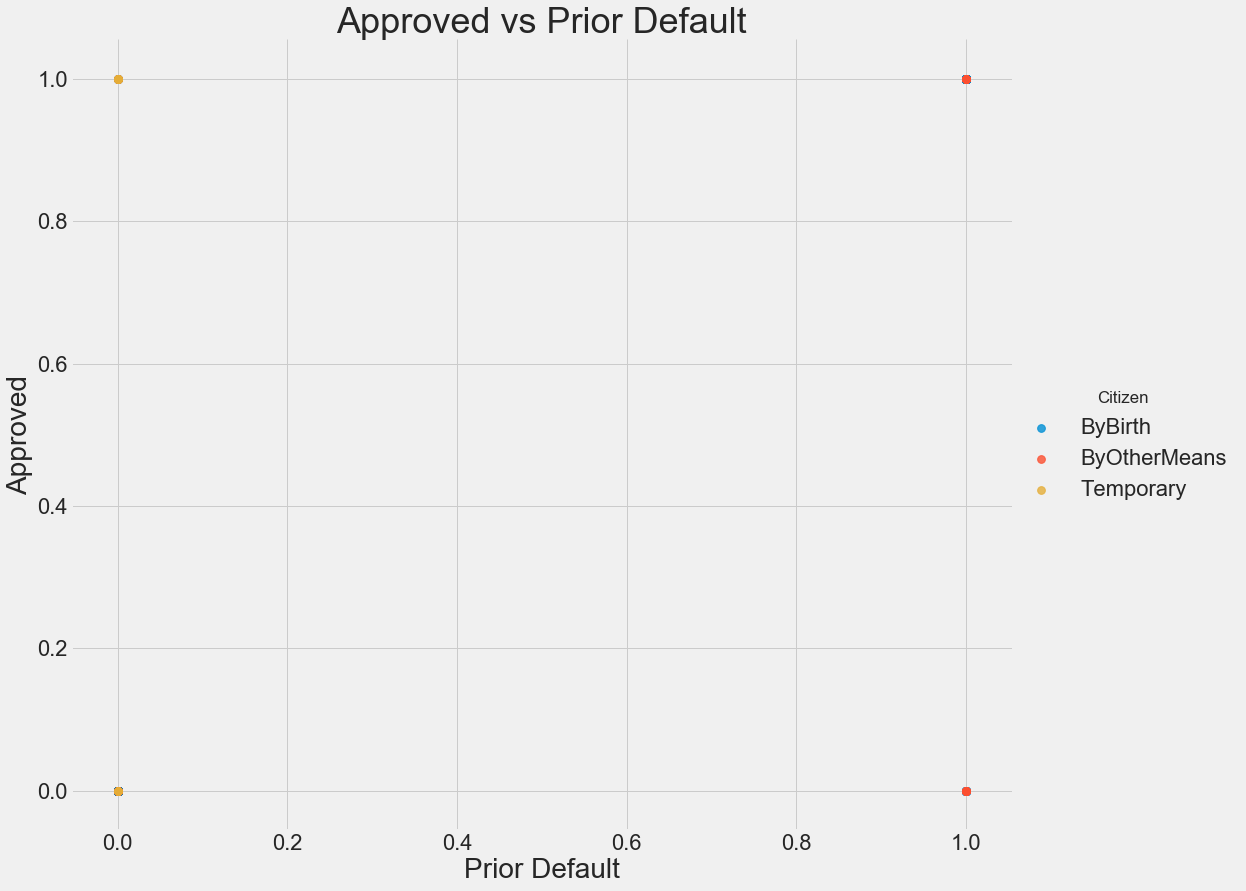

In [23]:
figsize(12, 10)

# Extract the Citizen types
features['Citizen'] = df.dropna(subset = ['Approved'])['Citizen']

# Limit to citizen types with more than 0 observations
features = features[features['Citizen'].isin(citizens)]

# Use seaborn to plot a scatterplot of Approved vs PriorDefault
sns.lmplot('PriorDefault', 'Approved', 
          hue = 'Citizen', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height = 12, aspect = 1.2)

# Plot labeling
plt.xlabel("Prior Default", size = 28)
plt.ylabel('Approved', size = 28)
plt.title('Approved vs Prior Default', size = 36)

This makes sense, although is probably not the best visual to showcase this. Prior Defaults are guided by binary selections as are approvals, thus explaining the binary polarization of the data presented in the scatterplot.

We can examine multiple variables as well using Pair plots.

Text(0.5, 1.02, 'Pairs Plot of Credit Card Data')

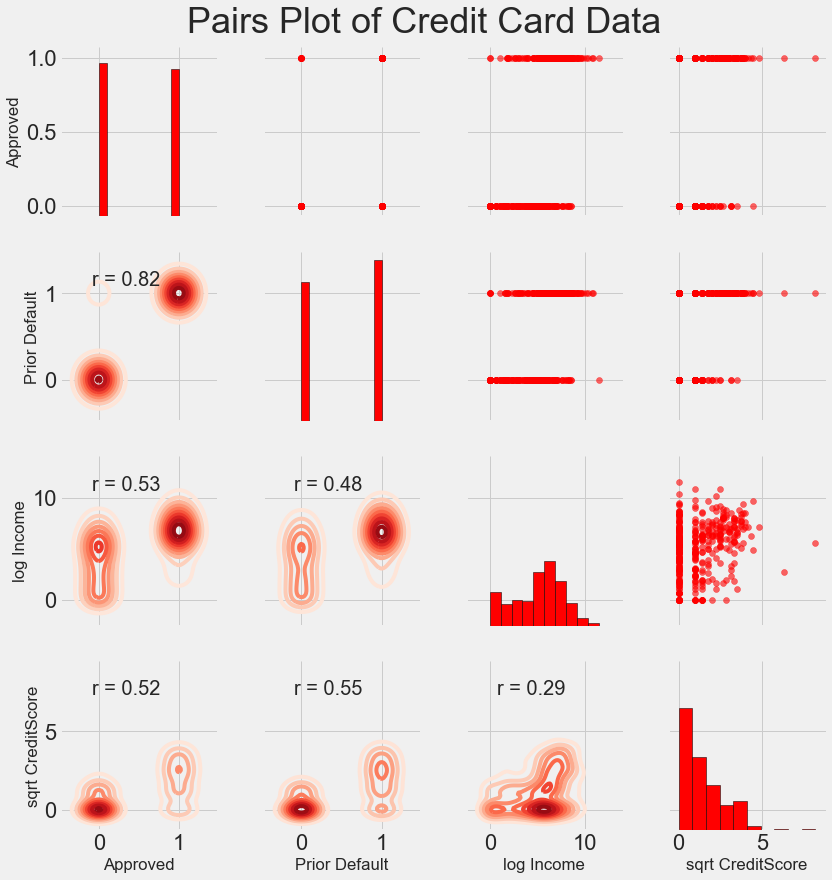

In [24]:
# Extract the columns to  plot
plot_data = features[['Approved', 'PriorDefault', 
                      'log_Income', 
                      'sqrt_CreditScore']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'PriorDefault': 'Prior Default', 
                                        'log_Income': 'log Income',
                                        'sqrt_CreditScore': 'sqrt CreditScore'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Credit Card Data', size = 36, y = 1.02)

Now that we have explored the data and have a good idea of the relationships presented, we can move on to feature engineering and feature selection.

Select numeric features, add in log transformations of the numeric features, select and one-hot encode categorical features, and join the sets of features together.

In [25]:
# Copy the original data
features = df.copy()

# Select the numeric columns
numeric_subset = df.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Approved column
    if col == 'Approved':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = df[['Industry', 'Ethnicity', 'Citizen']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(690, 47)

Now we need to remove collinear features, or features that have a strong correlation to one another. This prevents redundancies form occurring when training the model, thereby reducing model complexity. In this case, there are no inherent collinear features, but if this were the case we would need to remove them.

Import relevant sklearn library.

In [27]:
from sklearn.model_selection import train_test_split

Get the dummy variables for the categorical data.

In [45]:
df = pd.get_dummies(df, columns =['Industry', 'Ethnicity', 'Citizen'])
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0,0,0,1,0,0,0,1,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0,0,0,0,0,0,1,1,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Outline the data that you want to use to train the model. Separate by features and targets.

In [46]:
X = df.drop(columns=['Approved'])
Y = df['Approved']

Now we can establish a baseline for calculating the error of our model.

Import relevant sklearn libraries for logistical regression.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Create a LogisticRegression object.

In [48]:
model = LogisticRegression()

Train the model.

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
model.fit(X_train, Y_train)

/Users/rohith/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Predict which credit card applications are likely to be approved.

In [50]:
predicted_y = model.predict(X_test)
predicted_y

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

Check for accuracy of the model.

In [51]:
print('Accuracy: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy: 0.84


84% is not bad. We can definitely try to find a more accurate model. But for the current purposes, this is accurate enough. Logistic Regression is a good fit.